# Define the contour of given image

In [1]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread("photo.jpg")
image = cv2.resize(image, (500,500))  #resize
imageGray = cv2.cvtColor (image, cv2.COLOR_BGR2GRAY)     # Є ще cv2.COLOR_BGR2RGB  - convert to RGB

#estimatedThreshold, imageThreshold =cv2.threshold(imageGray,50,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU) #1
estimatedThreshold, imageThreshold = cv2.threshold(imageGray,90,255,cv2.THRESH_BINARY) #2

cv2.imshow('Image', imageThreshold)
cv2.waitKey(0)
cv2.destroyAllWindows()


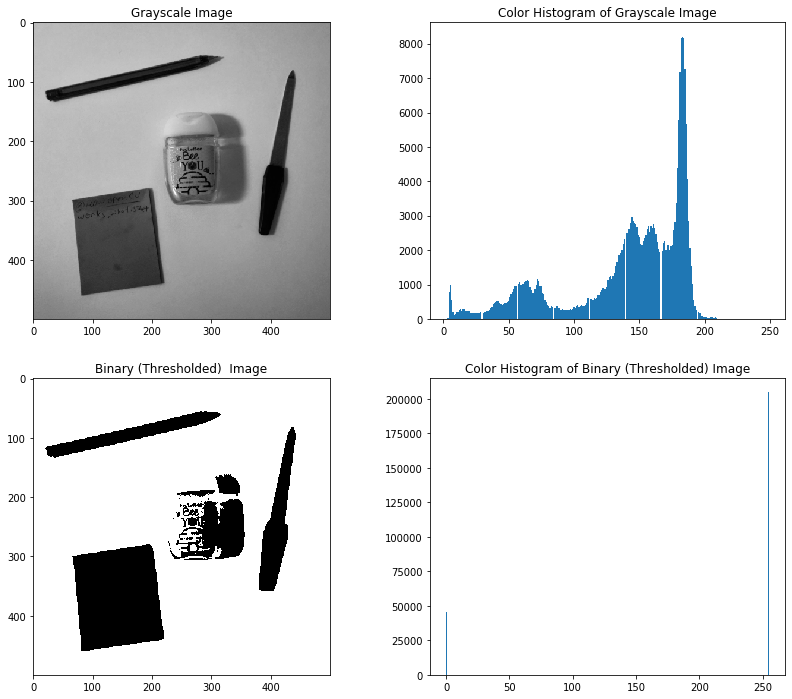

In [23]:
# PLOT HISTOGRAM OF THRESHOLDED AND GRAYSCALE IMAGES
"""
plt.figure(figsize=(14, 12))
plt.subplot(2,2,1), plt.imshow(imageGray,'gray'), plt.title('Grayscale Image')
plt.subplot(2,2,2), plt.hist(imageGray.ravel(), 256), plt.title('Color Histogram of Grayscale Image')
plt.subplot(2,2,3), plt.imshow(imageThreshold,'gray'), plt.title('Binary (Thresholded)  Image')
plt.subplot(2,2,4), plt.hist(imageThreshold.ravel(),256), plt.title('Color Histogram of Binary (Thresholded) Image')
plt.savefig('fig1.png')
plt.show()"""

In [4]:
## DETERMINE CONTOURS AND FILTER THEM
contours, hierarchy = cv2.findContours(imageThreshold,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
 
imageCopy = np.copy(image)
 
# draw all contours with setting the parameter to -1
# but if you use this function, you should comment the for loop below
#cv2.drawContours(resizedImageCopy,contours,-1,(0,0,255),2)
#filter contours 
for i, c in enumerate(contours):
    areaContour=cv2.contourArea(c)
    if areaContour<2000 or 100000<areaContour:
        continue
    cv2.drawContours(imageCopy,contours,i,(255,10,255),4)
     
# display the original image with contours
cv2.imshow('Image', imageCopy)
cv2.waitKey(0)
cv2.destroyAllWindows()
#cv2.imwrite("resizedPartsContours.png", imageCopy, [cv2.IMWRITE_PNG_COMPRESSION, 0]) 


In [ ]:
#save image
cv2.imwrite("resizedPartsGray.png", grayImage, [cv2.IMWRITE_PNG_COMPRESSION, 0]) 




#### <a href = "https://aleksandarhaber.com/contour-detection-in-opencv-python-opencv-tutorial-in-python/">Main reference</a> 